# Topic 1: Forecast the prices of Avocado in the US

## Business Objective/Problem
 - Bơ “Hass”, một công ty có trụ sở tại Mexico,
chuyên sản xuất nhiều loại quả bơ được bán
ở Mỹ. Họ đã rất thành công trong những năm
gần đây và muốn mở rộng. Vì vậy, họ muốn
xây dựng mô hình hợp lý để dự đoán giá
trung bình của bơ “Hass” ở Mỹ nhằm xem
xét việc mở rộng các loại trang trại Bơ đang
có cho việc trồng bơ ở các vùng khác.

## Triển khai dự án
### <font color='red'> Bước 1: Business Understanding
Dựa vào mô tả nói trên (hoặc sau khi đặt ra các câu
hỏi cụ thể cho doanh nghiệp và các đối tượng có liên
quan) => xác định được vấn đề:
- Hiện tại: Công ty kinh doanh quả bơ ở rất nhiều vùng của
nước Mỹ với 2 loại bơ là bơ thường và bơ hữu cơ, được
đóng gói theo nhiều quy chuẩn (Small/Large/XLarge Bags),
và có 3 PLU (Product Look Up) khác nhau (4046, 4225,
4770). Nhưng họ chưa có mô hình để dự đoán giá bơ cho
việc mở rộng.
- => Mục tiêu/ Vấn đề: Xây dựng mô hình dự đoán giá trung
bình của bơ “Hass” ở Mỹ => xem xét việc mở rộng sản xuất,
kinh doanh.

### <font color='red'>Bước 2: Data Understanding/ Acquire
#### Từ mục tiêu/ vấn đề đã xác định: xem xét các dữ liệu mà công ty đang có:
- Dữ liệu được lấy trực tiếp từ máy tính tiền của các nhà bán
lẻ dựa trên doanh số bán lẻ thực tế của bơ Hass.
- Dữ liệu đại diện cho dữ liệu lấy từ máy quét bán lẻ hàng
tuần cho lượng bán lẻ (National retail volume- units) và giá
bơ từ tháng 4/2015 đến tháng 3/2018.
- Giá Trung bình (Average Price) trong bảng phản ánh giá
trên một đơn vị (mỗi quả bơ), ngay cả khi nhiều đơn vị (bơ)
được bán trong bao.
- Mã tra cứu sản phẩm - Product Lookup codes (PLU’s) trong
bảng chỉ dành cho bơ Hass, không dành cho các sản phẩm
khác.


### Toàn bộ dữ liệu được đổ ra và lưu trữ trong tập tin avocado.csv với 18249 record. Với các cột:
  - Date - ngày ghi nhận
  - AveragePrice – giá trung bình của một quả bơ
  - Type - conventional / organic – loại: thông thường/ hữu cơ
  - Region – vùng được bán
  - Total Volume – tổng số bơ đã bán
  - 4046 – tổng số bơ có mã PLU 4046 đã bán
  - 4225 - tổng số bơ có mã PLU 4225 đã bán
  - 4770 - tổng số bơ có mã PLU 4770 đã bán
  - Total Bags – tổng số túi đã bán
  - Small/Large/XLarge Bags – tổng số túi đã bán theo size

Có hai loại bơ trong tập dữ liệu và một số vùng khác nhau. Điều
này cho phép chúng ta thực hiện tất cả các loại phân tích cho
các vùng khác nhau, hoặc phân tích toàn bộ nước Mỹ theo một
trong hai loại bơ.



=> Có thể tập trung giải quyết hai bài toán
- Bài toán 1: USA’s Avocado AveragePrice
Prediction – Sử dụng các thuật toán Regression
như Linear Regression, Random Forest,
XGB Regressor...
- Bài toán 2: Conventional/Organic Avocado
Average Price Prediction for the future in
California/NewYork… - sử dụng các thuật toán
Time Series như ARIMA, Prophet...

### <font color='red'> Bước 3: Data preparation/ Prepare

In [ ]:
! pip install fbprophet
! pip install pandas-profiling==2.7.1
! pip install pmdarima
! pip install xgboost
!pip install lazypredict

  Using cached numpy-1.21.4-cp37-cp37m-manylinux_2_12_x86_64.manylinux2010_x86_64.whl (15.7 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.19.1
    Uninstalling numpy-1.19.1:
      Successfully uninstalled numpy-1.19.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
yellowbrick 1.3.post1 requires numpy<1.20,>=1.16.0, but you have numpy 1.21.4 which is incompatible.
lazypredict 0.2.9 requires numpy==1.19.1, but you have numpy 1.21.4 which is incompatible.
imbalanced-learn 0.8.1 requires scikit-learn>=0.24, but you have scikit-learn 0.23.1 which is incompatible.
google-colab 1.0.0 requires pandas~=1.1.0; python_version >= "3.0", but you have pandas 1.0.5 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have img

  Using cached numpy-1.19.1-cp37-cp37m-manylinux2010_x86_64.whl (14.5 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.21.4
    Uninstalling numpy-1.21.4:
      Successfully uninstalled numpy-1.21.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pmdarima 1.8.4 requires numpy>=1.19.3, but you have numpy 1.19.1 which is incompatible.
imbalanced-learn 0.8.1 requires scikit-learn>=0.24, but you have scikit-learn 0.23.1 which is incompatible.
google-colab 1.0.0 requires pandas~=1.1.0; python_version >= "3.0", but you have pandas 1.0.5 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [ ]:
%cd '/content/gdrive/My Drive/LDS0_K271_PhamThiHoa/Project_1'

/content/gdrive/My Drive/LDS0_K271_PhamThiHoa/Project_1


In [ ]:
# import libraries
import numpy as np
import pandas as pd
import datetime

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from fbprophet import Prophet 
from fbprophet.plot import add_changepoints_to_plot

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error, mean_absolute_error
from math import sqrt
from pandas_profiling import ProfileReport

from statsmodels.tsa.seasonal import seasonal_decompose
from pmdarima import auto_arima
from statsmodels.tsa.holtwinters import ExponentialSmoothing

### Importing LazyRegressor
from lazypredict.Supervised import LazyRegressor
from sklearn.utils import shuffle

%run my_functions.ipynb
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:143: FutureWarning:

The sklearn.utils.testing module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.utils. Anything that cannot be imported from sklearn.utils is now part of the private API.



# Đọc dữ liệu

In [ ]:
data = pd.read_csv('avocado.csv')

In [ ]:
data.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.00,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.00,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.00,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.00,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.00,conventional,2015,Albany


In [ ]:
data = data.drop('Unnamed: 0', axis = 1)

In [ ]:
data.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.00,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.00,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.00,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.00,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.00,conventional,2015,Albany


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          18249 non-null  object 
 1   AveragePrice  18249 non-null  float64
 2   Total Volume  18249 non-null  float64
 3   4046          18249 non-null  float64
 4   4225          18249 non-null  float64
 5   4770          18249 non-null  float64
 6   Total Bags    18249 non-null  float64
 7   Small Bags    18249 non-null  float64
 8   Large Bags    18249 non-null  float64
 9   XLarge Bags   18249 non-null  float64
 10  type          18249 non-null  object 
 11  year          18249 non-null  int64  
 12  region        18249 non-null  object 
dtypes: float64(9), int64(1), object(3)
memory usage: 1.8+ MB


## Bài Toán 1: Organic Avocados' Price Prediction
- Thực hiện các tiền xử lý dữ liệu bổ sung (nếu cần)
- Ngoài những thuật toán regression đã được thực
hiện, có thuật toán nào khác cho kết quả tốt hơn
không? Thực hiện với thuật toán đó. Tổng hợp kết
quả thu được.

#### Use DataFrame df for Regression Algorithm

In [ ]:
df = data.copy(deep=True)

### 1. Kiểm tra dữ liệu: EDA

In [ ]:
ProfileReport(df)

Output hidden; open in https://colab.research.google.com to view.

#### From Pandas Prifiling Report, we see that:
-  No missing value
-  No duplicate rows

In [ ]:
# We can check again:
df.isnull().any()

Date            False
AveragePrice    False
Total Volume    False
4046            False
4225            False
4770            False
Total Bags      False
Small Bags      False
Large Bags      False
XLarge Bags     False
type            False
year            False
region          False
dtype: bool

In [ ]:
df.isna().any()

Date            False
AveragePrice    False
Total Volume    False
4046            False
4225            False
4770            False
Total Bags      False
Small Bags      False
Large Bags      False
XLarge Bags     False
type            False
year            False
region          False
dtype: bool

In [ ]:
df.duplicated().any()

False

In [ ]:
df.shape

(18249, 13)

In [ ]:
df = df.drop_duplicates()

In [ ]:
df.shape

(18249, 13)

# Phân tích đơn biến

In [ ]:
df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.00,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.00,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.00,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.00,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.00,conventional,2015,Albany


In [ ]:
lst_tencot = df.columns

In [ ]:
for i in lst_tencot:
        print(i,':',df.dtypes[i],':', len(df[i].unique()))
        print('-'*10, "\n")

Date : object : 169
---------- 

AveragePrice : float64 : 259
---------- 

Total Volume : float64 : 18237
---------- 

4046 : float64 : 17702
---------- 

4225 : float64 : 18103
---------- 

4770 : float64 : 12071
---------- 

Total Bags : float64 : 18097
---------- 

Small Bags : float64 : 17321
---------- 

Large Bags : float64 : 15082
---------- 

XLarge Bags : float64 : 5588
---------- 

type : object : 2
---------- 

year : int64 : 4
---------- 

region : object : 54
---------- 



type/
              type
conventional  9126
organic       9123


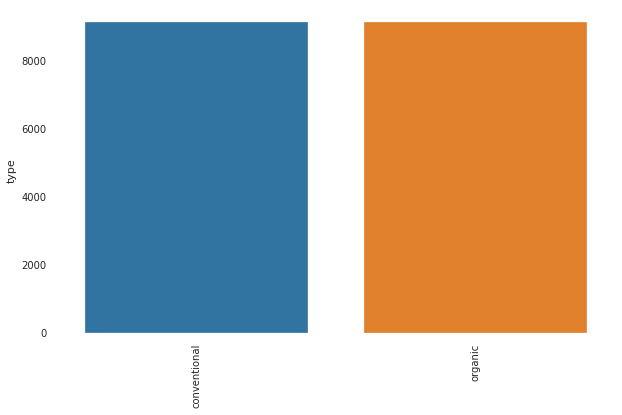

--------------------
year/
      year
2017  5722
2016  5616
2015  5615
2018  1296


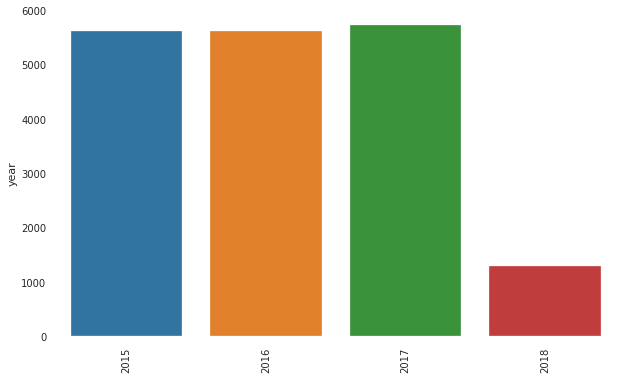

--------------------
region/
                     region
SouthCentral            338
NewOrleansMobile        338
SanDiego                338
Columbus                338
Portland                338
Boston                  338
LosAngeles              338
RichmondNorfolk         338
HartfordSpringfield     338
Chicago                 338
Seattle                 338
Spokane                 338
Indianapolis            338
TotalUS                 338
RaleighGreensboro       338
Louisville              338
BaltimoreWashington     338
Atlanta                 338
Jacksonville            338
CincinnatiDayton        338
Albany                  338
Sacramento              338
Boise                   338
Nashville               338
Roanoke                 338
Northeast               338
GreatLakes              338
SanFrancisco            338
Orlando                 338
Detroit                 338
Philadelphia            338
StLouis                 338
DallasFtWorth           338
Charlotte          

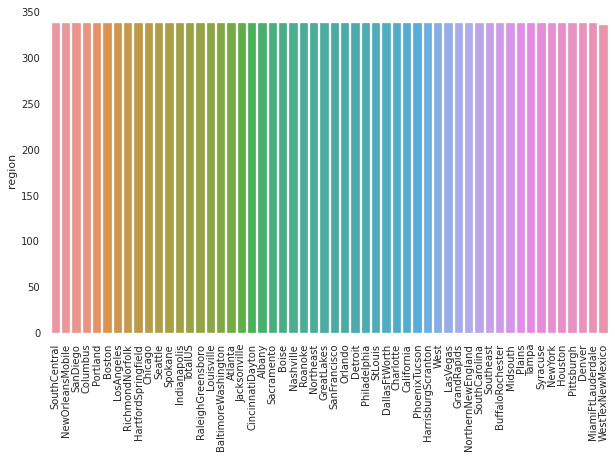

--------------------


In [ ]:
for i in ['type', 'year','region']:
  table = pd.DataFrame(df[i].value_counts())
  print(f'{i}/\n{table}')
  plt.figure(figsize = (10,6))
  sns.barplot(table.index,table[i])
  plt.xticks(rotation = 90)
  plt.show()
  print('-'*20)

### Biến phân loại ảnh hưởng đến AveragePrice

##### Kiểm tra type, year và region ảnh hưởng như thế nào đến AveragePrice

type - AveragePrice:
           type  AveragePrice
0  conventional          1.33
1  conventional          1.35
2  conventional          0.93
3  conventional          1.08
4  conventional          1.28


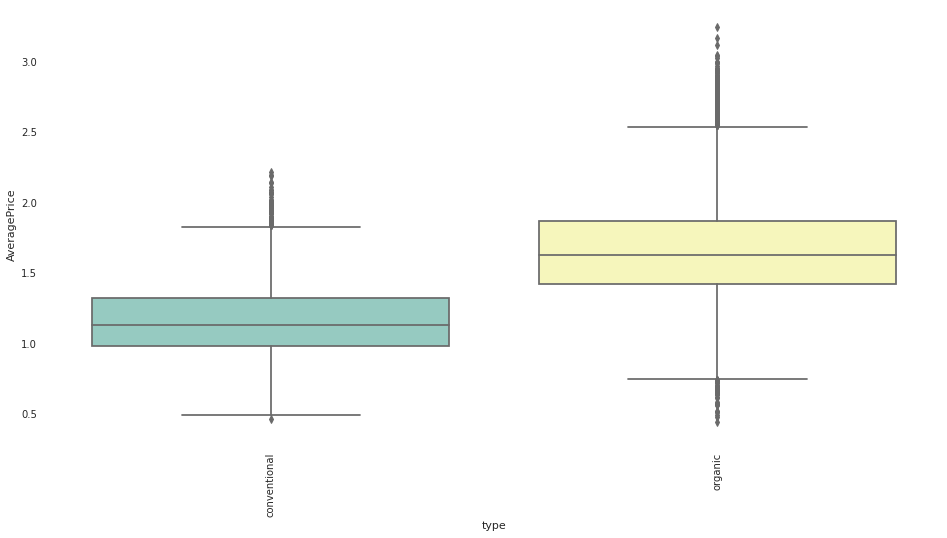

year - AveragePrice:
   year  AveragePrice
0  2015          1.33
1  2015          1.35
2  2015          0.93
3  2015          1.08
4  2015          1.28


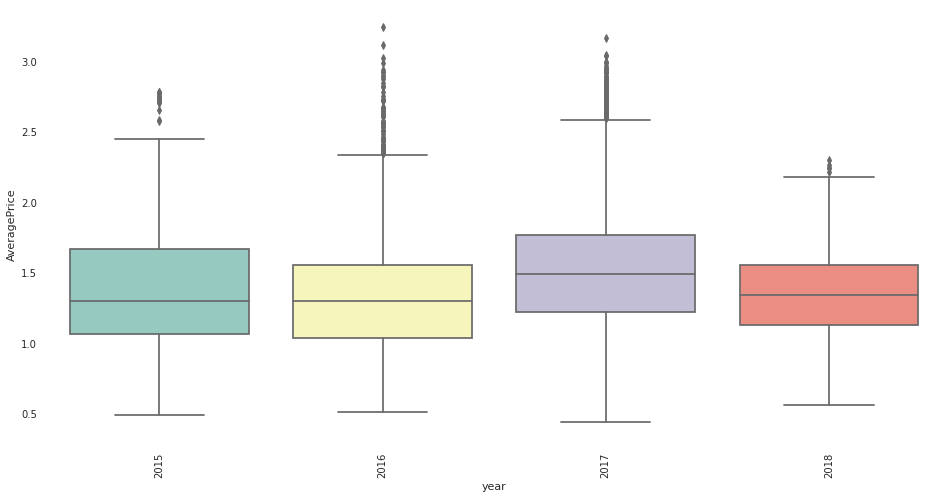

region - AveragePrice:
   region  AveragePrice
0  Albany          1.33
1  Albany          1.35
2  Albany          0.93
3  Albany          1.08
4  Albany          1.28


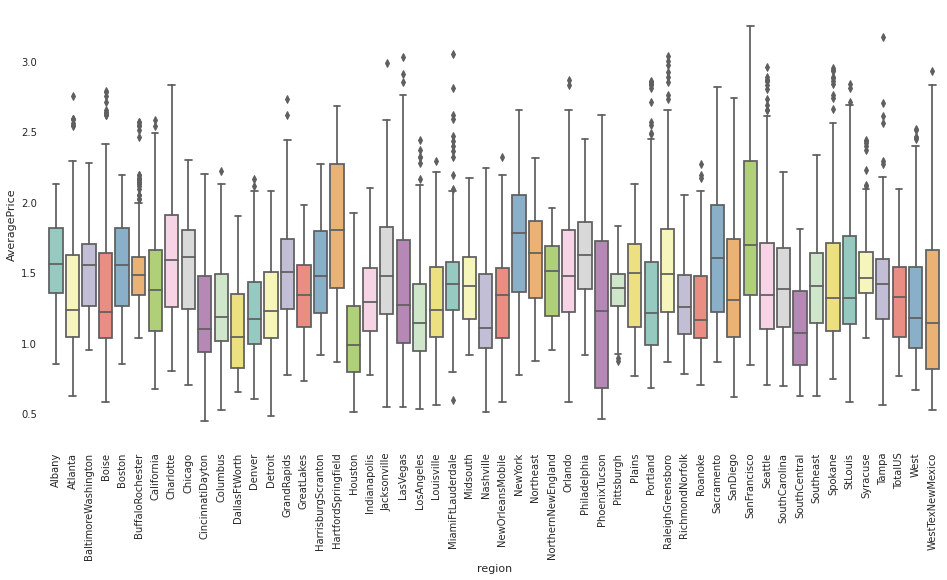

In [ ]:
for i in ['type', 'year','region']:
  for n in ['AveragePrice']:
      print(f'{i} - {n}:')
      df_sub = df[[i,n]]
      print(df_sub.head())
      plt.figure(figsize=(16,8))
      sns.boxplot(x = i, y = n, data= df_sub, palette='Set3')
      plt.xticks(rotation = 90)
      plt.show()

#### Nhận xét:
- Bơ Organic có giá cao hơn bơ Conventional => Type có ảnh hưởng đến AveragePrice
- Giá bơ giữa các năm có sự thay đổi.
- Giá bơ của mỗi bang là khác nhau => Region có ảnh hưởng đến AveragePrice

Ảnh hưởng của Region đến giá của từng loại bơ

conventional - region


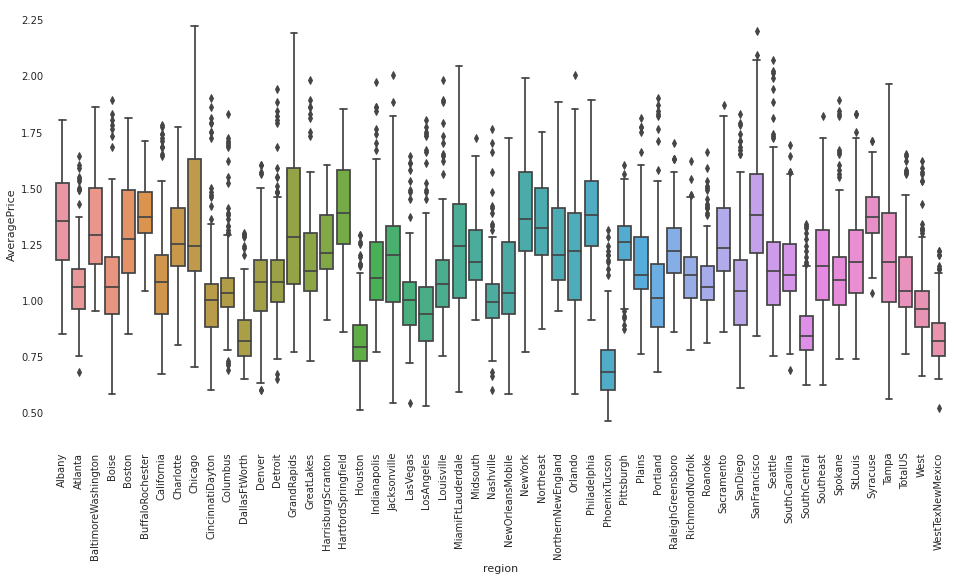

organic - region


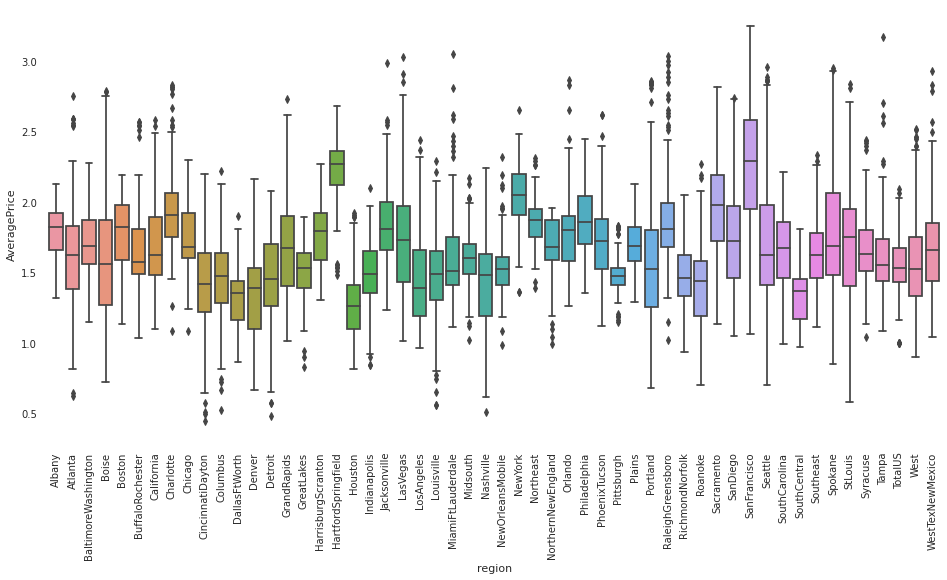

In [ ]:
for i in df.type.unique():
  print(f'{i} - region')
  plt.figure(figsize=(16,8))
  sns.boxplot(data=df[df['type']==i], x = 'region', y = 'AveragePrice')
  plt.xticks(rotation = 90)
  plt.show()

#### Nhận xét:
- Giá bơ của từng loại bơ là khác nhau ở mỗi khu vực, vậy region ảnh hưởng đến giá ở cả hai loại bơi Oganic và Conventional  

conventional - region


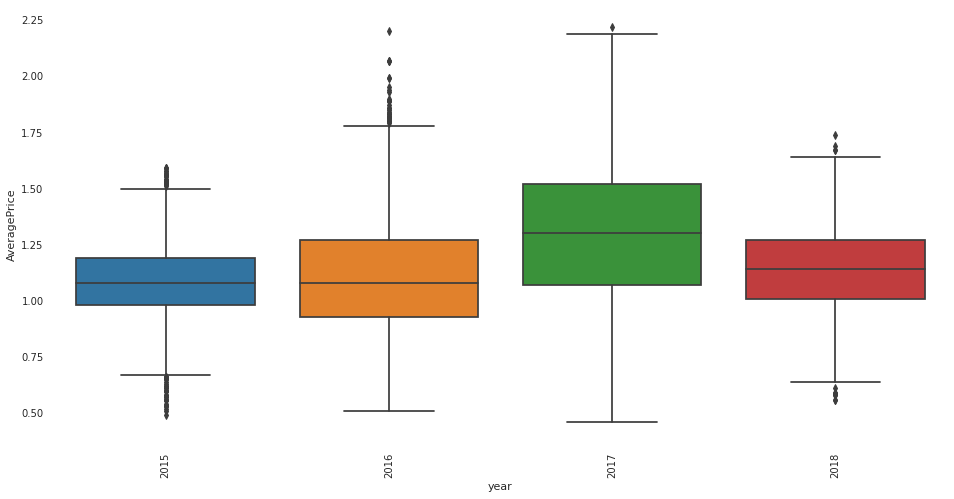

organic - region


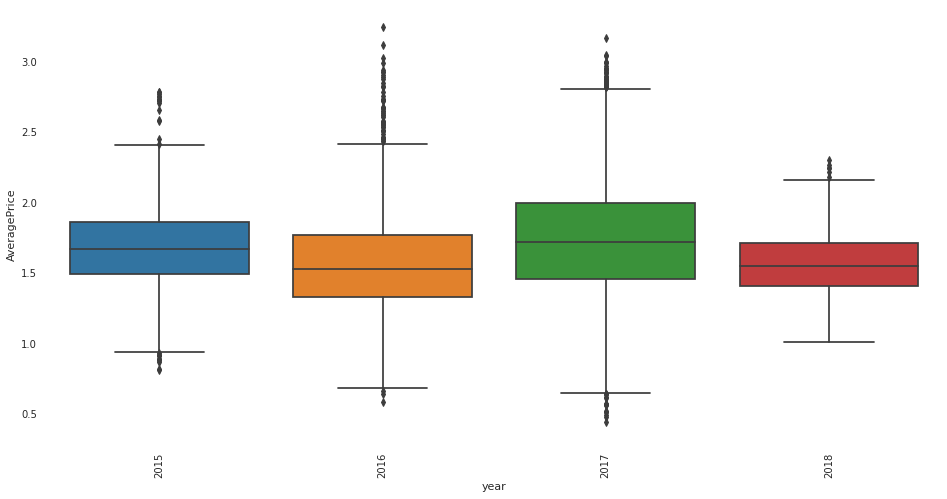

In [ ]:
# Giá bơ của từng loại bơ theo năm
for i in df.type.unique():
  print(f'{i} - region')
  plt.figure(figsize=(16,8))
  sns.boxplot(data=df[df['type']==i], x = 'year', y = 'AveragePrice')
  plt.xticks(rotation = 90)
  plt.show()

- Giá bơ biến động tăng - giảm qua mỗi năm => years ảnh hưởng đến AveragePrice


# Biến liên tục

AveragePrice /

Phương sai:  0.16214840834576077
Độ lệch chuẩn:  0.40267655549555004
Độ nghiêng:  0.5803027378878419
Độc dốc:  0.3251958506534338
Mode:  1.15
Range:  2.81


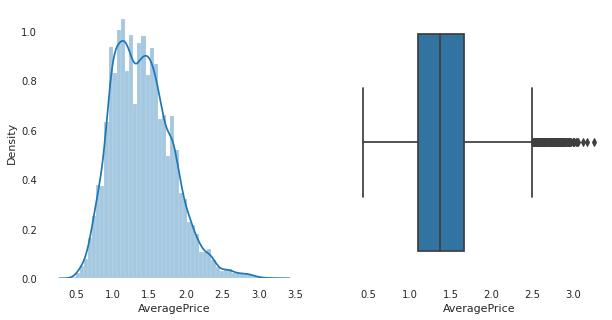

--------------------
Total Volume /

Phương sai:  11926975521801.33
Độ lệch chuẩn:  3453545.3553994815
Độ nghiêng:  9.00768747885452
Độc dốc:  92.10445777646086
Mode:  2038.99
Range:  62505561.96


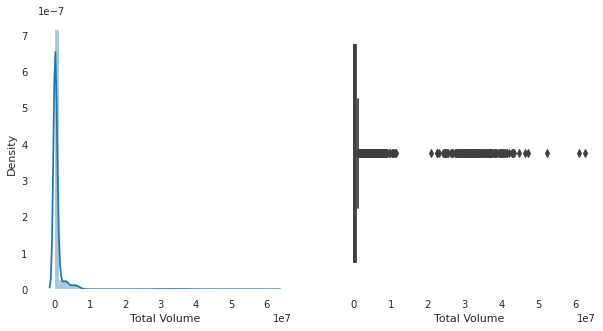

--------------------


In [ ]:
lst = ['AveragePrice', 'Total Volume']
for i in lst:
  print( i, '/\n')
  i_mode = df[i].mode()[0]
  i_range = df[i].max() - df[i].min()
  print('Phương sai: ',df[i].var())
  print('Độ lệch chuẩn: ', df[i].std())
  print('Độ nghiêng: ', df[i].skew())
  print('Độc dốc: ', df[i].kurt())
  print('Mode: ', i_mode)
  print('Range: ', i_range)
  plt.figure(figsize=(10,5))
  plt.subplot(1,2,1)
  sns.distplot(df[i])
  plt.subplot(1,2,2)
  sns.boxplot(df[i])
  plt.show()
  print('-'*20)

- AveragePrice  và Total price đều có oulier, tuy nhiên lựa chọn không bỏ những oulier này, bở vì trong bảng dữ liệu ngoài thể hiện số liệu của từng bang ơ Mỹ, thì nó cũng bao gồm cả dữ liệu của từng khu vực (bao gồm nhiều bang) và dữ liệu toàn nước Mỹ


#### Biến liên tục ảnh hưởng đến AveragePrice

In [ ]:
# Thông tin thống kê chung
df.describe()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.00,18249.00,18249.00,18249.00,18249.00,18249.00,18249.00,18249.00,18249.00,18249.00
mean,1.41,850644.01,293008.42,295154.57,22839.74,239639.20,182194.69,54338.09,3106.43,2016.15
std,0.40,3453545.36,1264989.08,1204120.40,107464.07,986242.40,746178.51,243965.96,17692.89,0.94
min,0.44,84.56,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2015.00
25%,1.10,10838.58,854.07,3008.78,0.00,5088.64,2849.42,127.47,0.00,2015.00
50%,1.37,107376.76,8645.30,29061.02,184.99,39743.83,26362.82,2647.71,0.00,2016.00
75%,1.66,432962.29,111020.20,150206.86,6243.42,110783.37,83337.67,22029.25,132.50,2017.00
max,3.25,62505646.52,22743616.17,20470572.61,2546439.11,19373134.37,13384586.80,5719096.61,551693.65,2018.00


In [ ]:
# Correlation
corr = df.corr()
corr

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
AveragePrice,1.00,-0.19,-0.21,-0.17,-0.18,-0.18,-0.17,-0.17,-0.12,0.09
Total Volume,-0.19,1.00,0.98,0.97,0.87,0.96,0.97,0.88,0.75,0.02
4046,-0.21,0.98,1.00,0.93,0.83,0.92,0.93,0.84,0.70,0.00
4225,-0.17,0.97,0.93,1.00,0.89,0.91,0.92,0.81,0.69,-0.01
4770,-0.18,0.87,0.83,0.89,1.00,0.79,0.80,0.70,0.68,-0.04
Total Bags,-0.18,0.96,0.92,0.91,0.79,1.00,0.99,0.94,0.80,0.07
Small Bags,-0.17,0.97,0.93,0.92,0.80,0.99,1.00,0.90,0.81,0.06
Large Bags,-0.17,0.88,0.84,0.81,0.70,0.94,0.90,1.00,0.71,0.09
XLarge Bags,-0.12,0.75,0.70,0.69,0.68,0.80,0.81,0.71,1.00,0.08
year,0.09,0.02,0.00,-0.01,-0.04,0.07,0.06,0.09,0.08,1.00


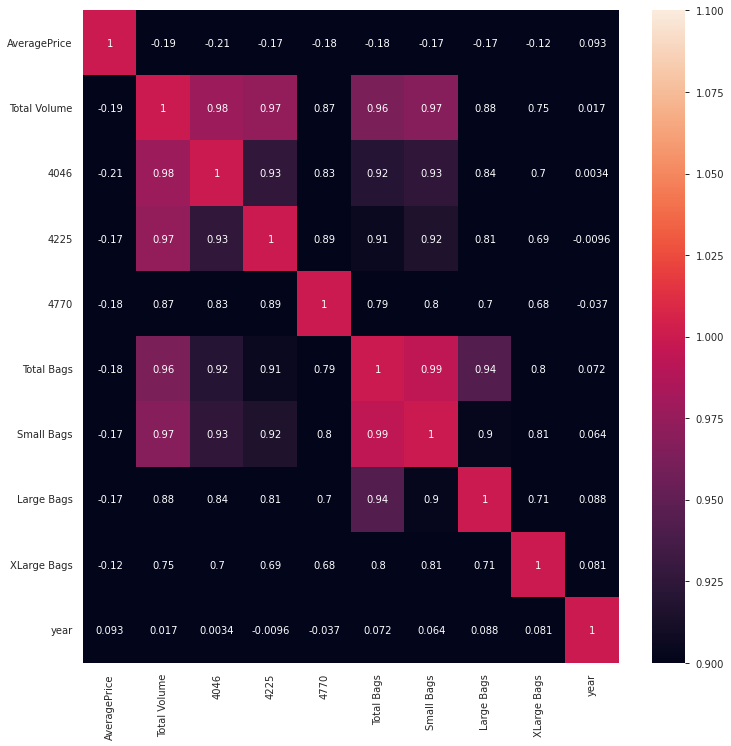

In [ ]:
plt.figure(figsize = (12,12))
sns.heatmap(corr, vmin = 1, vmax = 1, annot = True)
plt.yticks(rotation = 0)
plt.show()

#### Nhận xét:
- Biến 'AveragePrice' hầu như không có mối quan hệ tương quan tuyến tính với các biến liên tục khác
- Các biến 'Total Volume', '4046', '4225', '4770','Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags' có mối quan hệ tương quan tuyến tính mạnh với nhau, khi xây dựng Model có thể bỏ bớt một số thuộc tính


## Feature Engineering
- About Date , We can now the season in USA from https://seasonsyear.com/USA
- US's Spring months are March, April and May (3, 4, 5)
- US's Summer months are Jun, July and August (6, 7, 8)
- US's Autumn months are September, October and November (9, 10, 11)
- US's Winter months are December, January and February (12, 1, 2)

In [ ]:
# Hàm convert month
def convert_month(month):
  if month == 3 or month == 4 or month == 5:
    return 0
  elif month == 6 or month == 7 or month == 8:
    return 1
  elif month == 9 or month == 10 or month == 11:
    return 2 
  else:
    return 3 

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18249 entries, 0 to 18248
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          18249 non-null  object 
 1   AveragePrice  18249 non-null  float64
 2   Total Volume  18249 non-null  float64
 3   4046          18249 non-null  float64
 4   4225          18249 non-null  float64
 5   4770          18249 non-null  float64
 6   Total Bags    18249 non-null  float64
 7   Small Bags    18249 non-null  float64
 8   Large Bags    18249 non-null  float64
 9   XLarge Bags   18249 non-null  float64
 10  type          18249 non-null  object 
 11  year          18249 non-null  int64  
 12  region        18249 non-null  object 
dtypes: float64(9), int64(1), object(3)
memory usage: 2.6+ MB


In [ ]:
# Chuyển dữ liệu cột Date sang datetime
df['Date'] = pd.to_datetime(df['Date'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18249 entries, 0 to 18248
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          18249 non-null  datetime64[ns]
 1   AveragePrice  18249 non-null  float64       
 2   Total Volume  18249 non-null  float64       
 3   4046          18249 non-null  float64       
 4   4225          18249 non-null  float64       
 5   4770          18249 non-null  float64       
 6   Total Bags    18249 non-null  float64       
 7   Small Bags    18249 non-null  float64       
 8   Large Bags    18249 non-null  float64       
 9   XLarge Bags   18249 non-null  float64       
 10  type          18249 non-null  object        
 11  year          18249 non-null  int64         
 12  region        18249 non-null  object        
dtypes: datetime64[ns](1), float64(9), int64(1), object(2)
memory usage: 2.6+ MB


In [ ]:
# Tạo cột Month
df['Month'] = pd.DatetimeIndex(df['Date']).month

In [ ]:
# Tạo cột Season
df['Season'] = df['Month'].apply(lambda x: convert_month(x))

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18249 entries, 0 to 18248
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          18249 non-null  datetime64[ns]
 1   AveragePrice  18249 non-null  float64       
 2   Total Volume  18249 non-null  float64       
 3   4046          18249 non-null  float64       
 4   4225          18249 non-null  float64       
 5   4770          18249 non-null  float64       
 6   Total Bags    18249 non-null  float64       
 7   Small Bags    18249 non-null  float64       
 8   Large Bags    18249 non-null  float64       
 9   XLarge Bags   18249 non-null  float64       
 10  type          18249 non-null  object        
 11  year          18249 non-null  int64         
 12  region        18249 non-null  object        
 13  Month         18249 non-null  int64         
 14  Season        18249 non-null  int64         
dtypes: datetime64[ns](1), float64(9), in

conventional - Season


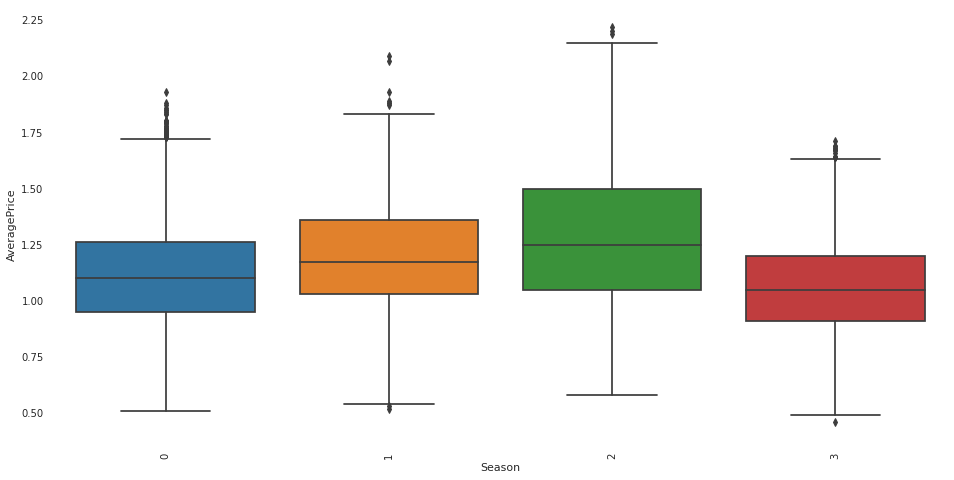

organic - Season


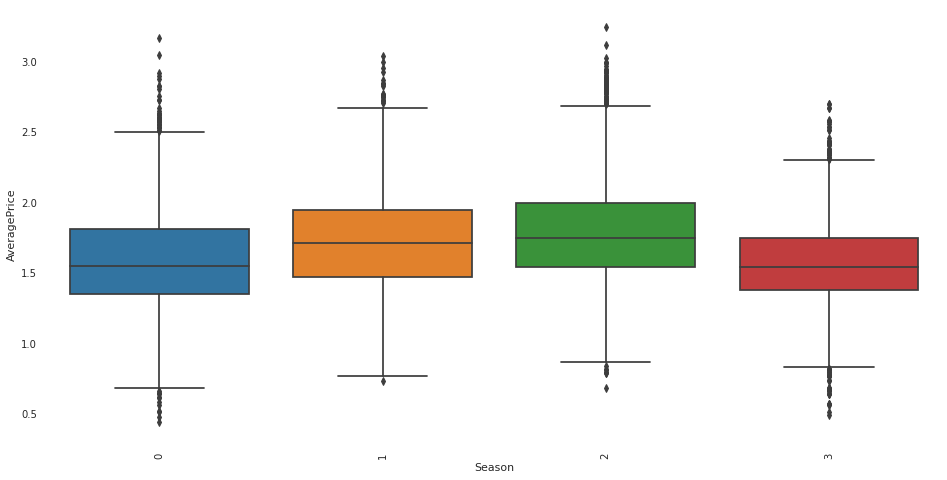

In [ ]:
# Xem xét mùa ảnh hưởng thế nào đến giá bơ
for i in df.type.unique():
  print(f'{i} - Season')
  plt.figure(figsize=(16,8))
  sns.boxplot(data=df[df['type']==i], x = 'Season', y = 'AveragePrice')
  plt.xticks(rotation = 90)
  plt.show()

conventional - Season


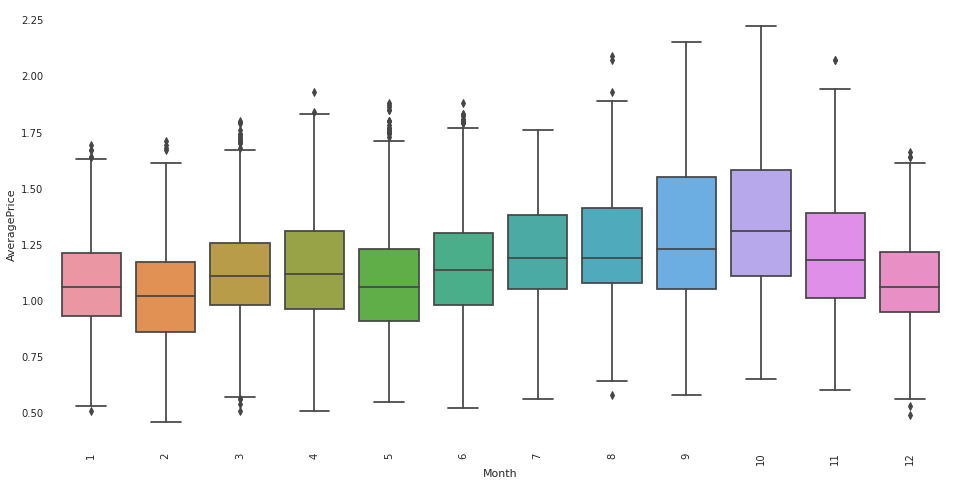

organic - Season


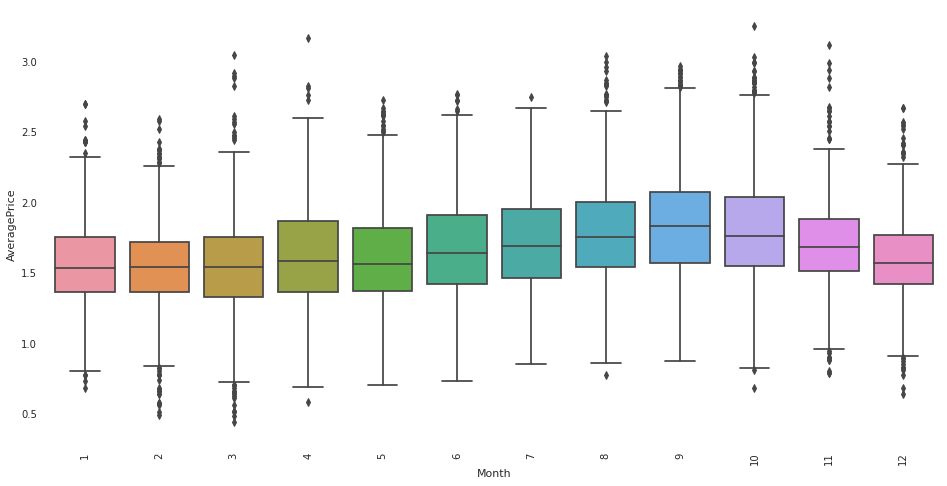

In [ ]:
df_sub = df[['Month','AveragePrice']]
# Xem xét mùa ảnh hưởng thế nào đến giá bơ
for i in df.type.unique():
  print(f'{i} - Season')
  plt.figure(figsize=(16,8))
  sns.boxplot(data=df[df['type']==i], x = 'Month', y = 'AveragePrice')
  plt.xticks(rotation = 90)
  plt.show()

# Nhận xét:
- Giá bơ từng mùa có thay đổi, tăng cao từ mùa xuân đến mùa thu, sau đó giá bơ giảm dần đến mùa đông => Season có ảnh hường đến AveragePrice
- Giá bơ tăng dần từ tháng 1 đến tháng 9, tháng 10 và giảm dần về cuối năm => Month ảnh hưởng đáng kể đến AveragePrice

In [ ]:
# Tạo cột type_new có giá trị 0, 1 từ type
df['type_new'] = LabelEncoder().fit_transform(df['type'])

In [ ]:
df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Season,type_new
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.00,conventional,2015,Albany,12,3,0
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.00,conventional,2015,Albany,12,3,0
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.00,conventional,2015,Albany,12,3,0
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.00,conventional,2015,Albany,12,3,0
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.00,conventional,2015,Albany,11,2,0


In [ ]:
# Tạo df_ohe sau khi get_dummies cột region
df_ohe = pd.get_dummies(data = df, columns= ['region'])

In [ ]:
df_ohe.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,Month,Season,type_new,region_Albany,region_Atlanta,region_BaltimoreWashington,region_Boise,region_Boston,region_BuffaloRochester,region_California,region_Charlotte,region_Chicago,region_CincinnatiDayton,region_Columbus,region_DallasFtWorth,region_Denver,region_Detroit,region_GrandRapids,region_GreatLakes,region_HarrisburgScranton,region_HartfordSpringfield,region_Houston,region_Indianapolis,region_Jacksonville,region_LasVegas,region_LosAngeles,region_Louisville,region_MiamiFtLauderdale,region_Midsouth,region_Nashville,region_NewOrleansMobile,region_NewYork,region_Northeast,region_NorthernNewEngland,region_Orlando,region_Philadelphia,region_PhoenixTucson,region_Pittsburgh,region_Plains,region_Portland,region_RaleighGreensboro,region_RichmondNorfolk,region_Roanoke,region_Sacramento,region_SanDiego,region_SanFrancisco,region_Seattle,region_SouthCarolina,region_SouthCentral,region_Southeast,region_Spokane,region_StLouis,region_Syracuse,region_Tampa,region_TotalUS,region_West,region_WestTexNewMexico
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.00,conventional,2015,12,3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.00,conventional,2015,12,3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.00,conventional,2015,12,3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.00,conventional,2015,12,3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.00,conventional,2015,11,2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
df_ohe = df_ohe.drop(['Date', '4046', '4225', '4770','Small Bags', 'Large Bags', 'XLarge Bags', 'type'], axis = 1)
df_ohe.head()

,AveragePrice,Total Volume,Total Bags,year,Month,Season,type_new,region_Albany,region_Atlanta,region_BaltimoreWashington,region_Boise,region_Boston,region_BuffaloRochester,region_California,region_Charlotte,region_Chicago,region_CincinnatiDayton,region_Columbus,region_DallasFtWorth,region_Denver,region_Detroit,region_GrandRapids,region_GreatLakes,region_HarrisburgScranton,region_HartfordSpringfield,region_Houston,region_Indianapolis,region_Jacksonville,region_LasVegas,region_LosAngeles,region_Louisville,region_MiamiFtLauderdale,region_Midsouth,region_Nashville,region_NewOrleansMobile,region_NewYork,region_Northeast,region_NorthernNewEngland,region_Orlando,region_Philadelphia,region_PhoenixTucson,region_Pittsburgh,region_Plains,region_Portland,region_RaleighGreensboro,region_RichmondNorfolk,region_Roanoke,region_Sacramento,region_SanDiego,region_SanFrancisco,region_Seattle,region_SouthCarolina,region_SouthCentral,region_Southeast,region_Spokane,region_StLouis,region_Syracuse,region_Tampa,region_TotalUS,region_West,region_WestTexNewMexico
0,1.33,64236.62,8696.87,2015,12,3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1.35,54876.98,9505.56,2015,12,3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0.93,118220.22,8145.35,2015,12,3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1.08,78992.15,5811.16,2015,12,3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1.28,51039.60,6183.95,2015,11,2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
scale = RobustScaler()
df_scale =  scale.fit_transform(df_ohe)
df_scale = pd.DataFrame(df_scale,columns=df_ohe.columns)
df_scale.head()

,AveragePrice,Total Volume,Total Bags,year,Month,Season,type_new,region_Albany,region_Atlanta,region_BaltimoreWashington,region_Boise,region_Boston,region_BuffaloRochester,region_California,region_Charlotte,region_Chicago,region_CincinnatiDayton,region_Columbus,region_DallasFtWorth,region_Denver,region_Detroit,region_GrandRapids,region_GreatLakes,region_HarrisburgScranton,region_HartfordSpringfield,region_Houston,region_Indianapolis,region_Jacksonville,region_LasVegas,region_LosAngeles,region_Louisville,region_MiamiFtLauderdale,region_Midsouth,region_Nashville,region_NewOrleansMobile,region_NewYork,region_Northeast,region_NorthernNewEngland,region_Orlando,region_Philadelphia,region_PhoenixTucson,region_Pittsburgh,region_Plains,region_Portland,region_RaleighGreensboro,region_RichmondNorfolk,region_Roanoke,region_Sacramento,region_SanDiego,region_SanFrancisco,region_Seattle,region_SouthCarolina,region_SouthCentral,region_Southeast,region_Spokane,region_StLouis,region_Syracuse,region_Tampa,region_TotalUS,region_West,region_WestTexNewMexico
0,-0.07,-0.10,-0.29,-0.50,1.00,0.33,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1,-0.04,-0.12,-0.29,-0.50,1.00,0.33,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,-0.79,0.03,-0.30,-0.50,1.00,0.33,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3,-0.52,-0.07,-0.32,-0.50,1.00,0.33,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
4,-0.16,-0.13,-0.32,-0.50,0.83,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [ ]:
X = df_scale.drop(['AveragePrice'], axis = 1)
y = df_scale['AveragePrice']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size =0.3, random_state = 123)

# Sử dụng LazyRegressor
- Để tham khảo kết quả của các Model khi áp dụng cho bộ dữ liệu này

In [ ]:
reg = LazyRegressor(verbose=0,ignore_warnings= False, custom_metric=None)

In [ ]:
reg_models, reg_predictions = reg.fit(X_train, X_test, y_train, y_test)

 21%|██▏       | 9/42 [00:13<01:35,  2.89s/it]

GammaRegressor model failed to execute
Some value(s) of y are out of the valid range for family GammaDistribution


 74%|███████▍  | 31/42 [02:48<01:01,  5.63s/it]

PoissonRegressor model failed to execute
Some value(s) of y are out of the valid range for family PoissonDistribution


100%|██████████| 42/42 [03:27<00:00,  4.94s/it]


In [ ]:
reg_models

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
ExtraTreesRegressor,0.91,0.91,0.21,9.33
RandomForestRegressor,0.90,0.90,0.22,8.43
XGBRegressor,0.89,0.89,0.24,3.07
BaggingRegressor,0.89,0.89,0.24,0.95
HistGradientBoostingRegressor,0.86,0.86,0.27,1.95
LGBMRegressor,0.86,0.86,0.27,0.64
ExtraTreeRegressor,0.85,0.85,0.28,0.19
KNeighborsRegressor,0.84,0.84,0.29,4.14
MLPRegressor,0.84,0.84,0.29,18.49


- Từ kết quả bảng trên, ta thấy rằng khi sử dụng các Model ExtraTreesRegressor, RandomForestRegressor, XGBRegressor, BaggingRegressor thì kết quả thu được khá cao cho R.
- Vì vậy ngoài 3 Model RandomForestRegressor, XGBRegressor, và LinearRegressor, em lựa chọn sử dụng thêm 2 thuật toán BaggingRegressor và ExtraTreesRegressor cho bài toán này

## Bước 4&5: Modeling & Evaluation/ Analyze & Report

In [ ]:
test_size_lst = [0.3,0.25,0.2]
lst_models_chol = [
    LinearRegression(),
    BaggingRegressor(),
    ExtraTreesRegressor(),
    RandomForestRegressor(n_estimators=300),
    XGBRegressor()
]
CV = 2
random_state = 1
cv_df = models_dudoan(test_size_lst,lst_models_chol,X, y,CV, random_state)

In [ ]:
cv_df

,model_name,test_size,score_train_mean,score_test_mean,abs_mean,time_score_mean
0,LinearRegression,0.30,0.59,0.59,0.00,58.35
1,BaggingRegressor,0.30,0.98,0.89,0.09,942.55
2,ExtraTreesRegressor,0.30,1.00,0.91,0.09,491.60
3,RandomForestRegressor,0.30,0.99,0.91,0.08,210.55
4,XGBRegressor,0.30,0.94,0.89,0.05,855.70
5,LinearRegression,0.25,0.59,0.60,0.01,65.75
6,BaggingRegressor,0.25,0.98,0.90,0.08,483.95
7,ExtraTreesRegressor,0.25,1.00,0.92,0.08,632.50
8,RandomForestRegressor,0.25,0.99,0.91,0.08,127.65
9,XGBRegressor,0.25,0.94,0.89,0.05,93.20


- Từ kết quả trên có thể thấy mô hình  LinearRegression khi áp dụng vào bài toán này cho kết quả khá thấp (<= 60%), nguyên nhân là do biến AveragePrice hầu như không có mối quan hệ tương quan tuyến tính với các biến khác.
- Bốn Model còn lại: Model ExtraTreesRegressor, RandomForestRegressor, XGBRegressor, BaggingRegressor đều cho kết quả khá cao khi áp dụng vào bài toán này (>89%)
- Từ kết quả trên có thể thấy được, mô hình ExtraTreesRegressor khi chia tập dữ liệu test_size = 0.2 có kế quả cao nhất (93%) trong các mô hình được áp dụng
- => Em lựa chọn mô hình ExtraTreesRegressor (tập dữ liệu có test_size = 0.2) để áp dụng vào bài toán này

# Áp dụng Model ExtraTreesRegressor

In [ ]:
# Chia tập dữ liệu với test_size =0.2 và random_state = 1
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=1)

In [ ]:
Input_Ext = [('scaler', RobustScaler()),('Ext', ExtraTreesRegressor())]
pipe_Ext = Pipeline(Input_Ext)
pipe_Ext.fit(X_train, y_train)
yhat_test = pipe_Ext.predict(X_test)
yhat_train = pipe_Ext.predict(X_train)
r2_train = r2_score(y_train, yhat_train)
mae_train = mean_absolute_error(y_train, yhat_train)
r2_test = r2_score(y_test, yhat_test)
mae_test = mean_absolute_error(y_test, yhat_test)

In [ ]:
print('Train data R-square:', r2_train)
print('-'*20)
print('Train data MAE:', mae_train)
print('-'*20)
print('Test data R-square:', r2_test)
print('-'*20)
print('Test data MAE:', mae_test)
print('-'*20)

Train data R-square: 1.0
--------------------
Train data MAE: 6.318414484299332e-16
--------------------
Test data R-square: 0.9259652822947069
--------------------
Test data MAE: 0.132652397260274
--------------------


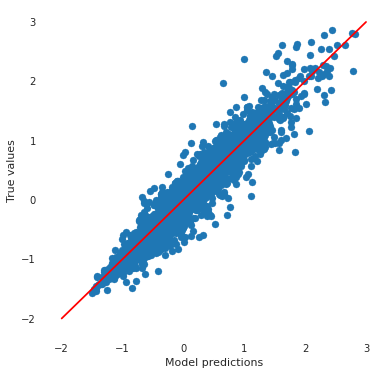

--------------------


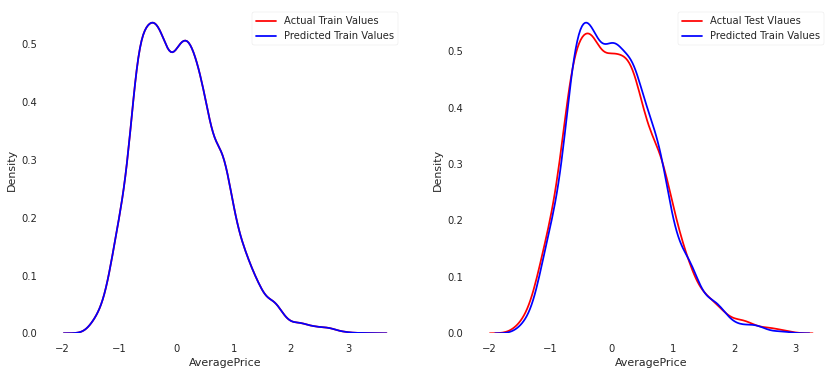

In [ ]:
# Đánh giá mô hình
plt.figure(figsize=(6,6))
plt.scatter(yhat_test, y_test)
plt.xlabel('Model predictions')
plt.ylabel('True values')
plt.plot([-2,3], [-2,3], 'k-', color='r')
plt.show()
print('-'*20)
# Distribution plot
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
ax1 = sns.distplot(y_train, hist= False, color='r', label= 'Actual Train Values')
sns.distplot(yhat_train, hist= False, color='b', label= 'Predicted Train Values', ax=ax1)
plt.legend()
plt.subplot(1,2,2)
ax2 = sns.distplot(y_test, hist= False, color='r', label= 'Actual Test Vlaues')
sns.distplot(yhat_test, hist= False, color='b', label= 'Predicted Train Values', ax=ax2)
plt.legend()
plt.show()

# Report

- Sau khi thực hiện các Model, ta nhận thấy rằng model ExtraTreesRegressor có kết quả tốt nhất với các chỉ số kết quả

In [ ]:
report = pd.DataFrame({'Model': ['ExtraTreesRegressor'], 'R-square Train': [r2_train],'R-square Test': [r2_test],'MAE Train': [mae_train], 'MAE Test': [mae_test]})
report

,Model,R-square Train,R-square Test,MAE Train,MAE Test
0,ExtraTreesRegressor,1.00,0.93,0.00,0.13


# Lưu Model

In [ ]:
import pickle
pkl_filename = 'Cau1_PJ1.pkl'
with open(pkl_filename, 'wb') as file:
    pickle.dump(pipe_Ext, file)